In [ ]:
from pandas import read_csv
import numpy as np

In [4]:
df = read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
df = read_csv('AirPassengers.csv', usecols = [1])
df

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [7]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [8]:
values = df.values.astype('float32')
print(values.shape)
values

(144, 1)


array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [9]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0] - train_size
train = values[0:train_size]
test = values[train_size:]

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [11]:
def create_dataset(data, k):
    dataX, dataY = [], []
    for i in range(data.shape[0] - k):
        x = data[i:i+k, 0]
        y = data[i+k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [12]:
# Testing create dataset function
create_dataset(test, 15)

(array([[0.682848  , 0.63754046, 0.815534  , 0.7896441 , 0.8122978 ,
         1.0291263 , 1.1682849 , 1.1747574 , 0.97087383, 0.7864078 ,
         0.6504855 , 0.7508091 , 0.7637541 , 0.69255674, 0.8349515 ],
        [0.63754046, 0.815534  , 0.7896441 , 0.8122978 , 1.0291263 ,
         1.1682849 , 1.1747574 , 0.97087383, 0.7864078 , 0.6504855 ,
         0.7508091 , 0.7637541 , 0.69255674, 0.8349515 , 0.7896441 ],
        [0.815534  , 0.7896441 , 0.8122978 , 1.0291263 , 1.1682849 ,
         1.1747574 , 0.97087383, 0.7864078 , 0.6504855 , 0.7508091 ,
         0.7637541 , 0.69255674, 0.8349515 , 0.7896441 , 0.8381878 ],
        [0.7896441 , 0.8122978 , 1.0291263 , 1.1682849 , 1.1747574 ,
         0.97087383, 0.7864078 , 0.6504855 , 0.7508091 , 0.7637541 ,
         0.69255674, 0.8349515 , 0.7896441 , 0.8381878 , 1.0711975 ],
        [0.8122978 , 1.0291263 , 1.1682849 , 1.1747574 , 0.97087383,
         0.7864078 , 0.6504855 , 0.7508091 , 0.7637541 , 0.69255674,
         0.8349515 , 0.7896441

In [13]:
look_back = 12
# we want window of 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
trainX.shape

(84, 12)

In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(84, 12, 1)

In [16]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [17]:
model = Sequential()
model.add(SimpleRNN(4, input_shape = (12, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1)

Epoch 1/100
84/84 [==============================] - 1s 2ms/step - loss: 0.1838
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0212
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 9/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 10/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 11/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 12/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 13/100
84/84 [=================

In [53]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testPredict.shape

(36, 1)

In [54]:
testPredict = scaler.inverse_transform(testPredict).ravel()
# Converts to 1D
testPredict.shape

(36,)

In [55]:
trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

((36,), (36,))

In [56]:
from matplotlib import pyplot as plt

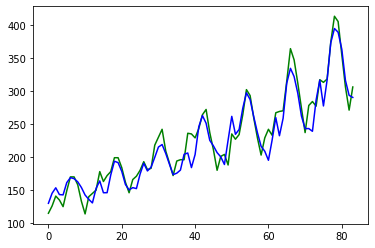

In [57]:
plt.plot(trainTrue, c = 'g')
plt.plot(trainPredict, c = 'b')
plt.show()

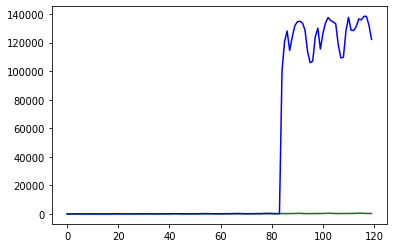

In [59]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()